In [13]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext(master ='local')



In [14]:
spark = SparkSession.builder.appName('example').getOrCreate()

In [16]:
iphones_RDD =  sc.parallelize ([
  ("XS", 2018, 5.65, 2.79, 6.24),
  ("XR", 2018, 5.94, 2.98, 6.84),
  ("X10", 2017, 5.65, 2.79, 6.13),
  ("8PLUS", 2017, 6.23, 3.07, 7.12)
])

names = ["Model", "Year", "Height", "Width", "Weight"]

iphones_df = spark.createDataFrame (iphones_RDD, schema=names)
type(iphones_df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_csv = spark.read.csv("people.csv", header=True , inferSchema=True)
df_json = spark.read.json("people.json", header=True, inferSchema=True)
df_txt = spark.read.txt("people.txt", header=True, inferSchema= True)

In [21]:
# Create a list of tuples
sample_list = [('Mona',20,'Female'), ('Jennifer',34,'Female'), ('John',20,'male'), ('Jim',26,'male')]

# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
people_df = spark.createDataFrame(rdd, schema=['Name', 'Age','sex'])

# Check the type of names_df
print("The type of names_df is", type(people_df))

# The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [22]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))



+--------+---+------+
|    Name|Age|   sex|
+--------+---+------+
|    Mona| 20|Female|
|Jennifer| 34|Female|
|    John| 20|  male|
|     Jim| 26|  male|
+--------+---+------+

There are 4 rows in the people_df DataFrame.
There are 3 columns in the people_df DataFrame and their names are ['Name', 'Age', 'sex']


In [24]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'age')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

# There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates

+--------+------+---+
|    name|   sex|age|
+--------+------+---+
|    Mona|Female| 20|
|Jennifer|Female| 34|
|    John|  male| 20|
|     Jim|  male| 26|
+--------+------+---+

There were 4 rows before removing duplicates, and 4 rows after removing duplicates


In [25]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

# There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame

There are 0 rows in the people_df_female DataFrame and 2 rows in the people_df_male DataFrame


In [26]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)


+--------+
|    name|
+--------+
|    Mona|
|Jennifer|
|    John|
|     Jim|
+--------+



In [ ]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

# There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames

The column names of names_df are ['Name', 'Age', 'sex']


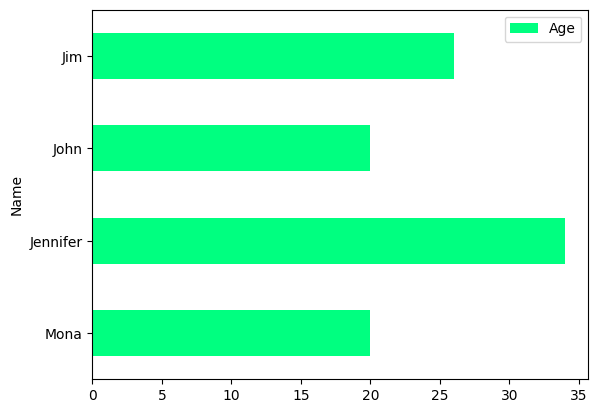

In [27]:
from matplotlib import pyplot as plt

# Check the column names of names_df
print("The column names of names_df are", people_df.columns)

# Convert to Pandas DataFrame  
df_pandas = people_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()